# Python Statistics Walkthrough

This notebook follows the SciPy Statistics tutorial to explore essential statistical analysis and visualization methods using Python. 

We will cover:

- Loading and exploring datasets
- Descriptive statistics
- Data visualization
- Correlation analysis
- Hypothesis testing

Each section includes code examples with detailed comments and explanations.


## Boxplots and paired differences
Plot boxplots for FSIQ, PIQ, and the paired difference between the two: while the spread (error bars) for FSIQ and PIQ are very large, there is a systematic (common) effect due to the subjects. This effect is cancelled out in the difference and the spread of the difference (“paired” by subject) is much smaller than the spread of the individual measures.

In [2]:
import os
print(os.getcwd())


/users/PAS2797/kehindesoetan/Assignment4-Stats-Scripts


In [5]:
import urllib.request

url = 'https://raw.githubusercontent.com/scipy-lectures/scipy-lecture-notes/main/packages/statistics/examples/brain_size.csv'
urllib.request.urlretrieve(url, 'brain_size.csv')


('brain_size.csv', <http.client.HTTPMessage at 0x14682ad24dc0>)

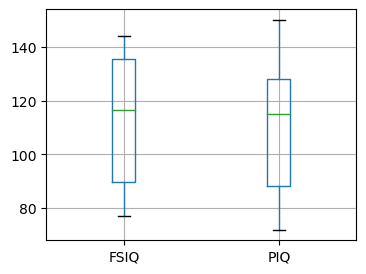

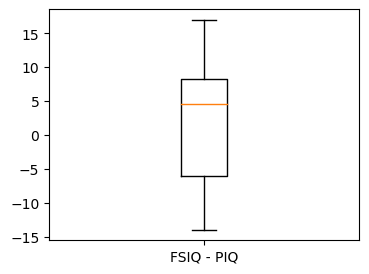

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV you just downloaded
data = pd.read_csv('brain_size.csv', sep=';', na_values='.')

# Box plot of FSIQ and PIQ (different measures of IQ)
plt.figure(figsize=(4, 3))
data.boxplot(column=['FSIQ', 'PIQ'])

# Boxplot of the difference
plt.figure(figsize=(4, 3))
plt.boxplot(data['FSIQ'] - data['PIQ'])
plt.xticks((1,), ('FSIQ - PIQ',))

plt.show()


## Plotting simple quantities of a pandas dataframe
This example loads from a CSV file data with mixed numerical and categorical entries, and plots a few quantities, separately for females and males, thanks to the pandas integrated plotting tool (that uses matplotlib behind the scene).

In [8]:
In [1]: import matplotlib.pyplot as plt

In [2]: plt.close("all")

Basic plotting: plot
We will demonstrate the basics, see the cookbook for some advanced strategies.

The plot method on Series and DataFrame is just a simple wrapper around plt.plot():

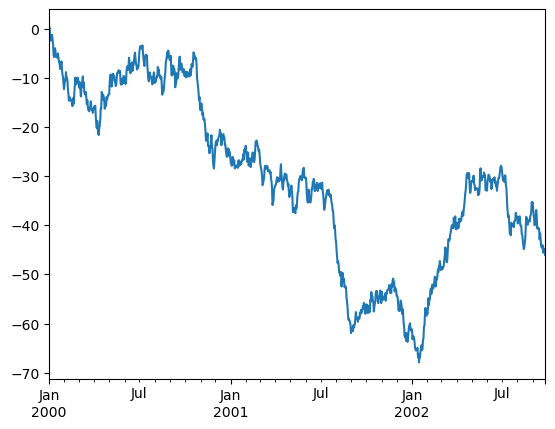

In [10]:
import numpy as np
In [3]: np.random.seed(123456)

In [4]: ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))

In [5]: ts = ts.cumsum()

In [6]: ts.plot();

If the index consists of dates, it calls gcf().autofmt_xdate() to try to format the x-axis nicely as per above.

On DataFrame, plot() is a convenience to plot all of the columns with labels:

<Figure size 640x480 with 0 Axes>

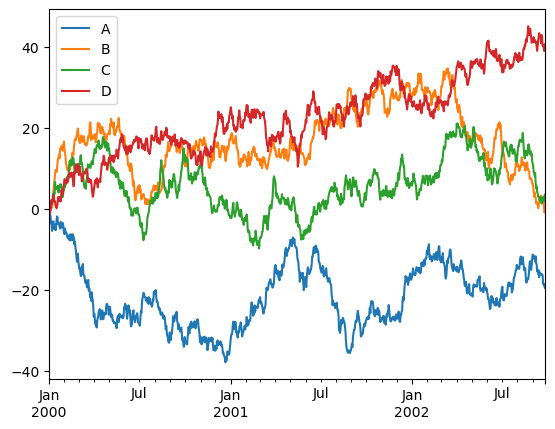

In [11]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))

df = df.cumsum()

plt.figure();

df.plot();

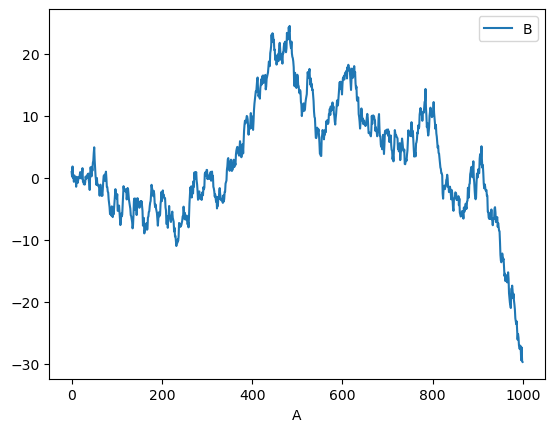

In [12]:
In [11]: df3 = pd.DataFrame(np.random.randn(1000, 2), columns=["B", "C"]).cumsum()

In [12]: df3["A"] = pd.Series(list(range(len(df))))

In [13]: df3.plot(x="A", y="B");

## Other plots
Plotting methods allow for a handful of plot styles other than the default line plot. These methods can be provided as the kind keyword argument to plot(), and include:

‘bar’ or ‘barh’ for bar plots

‘hist’ for histogram

‘box’ for boxplot

‘kde’ or ‘density’ for density plots

‘area’ for area plots

‘scatter’ for scatter plots

‘hexbin’ for hexagonal bin plots

‘pie’ for pie plots

For example, a bar plot can be created the following way:

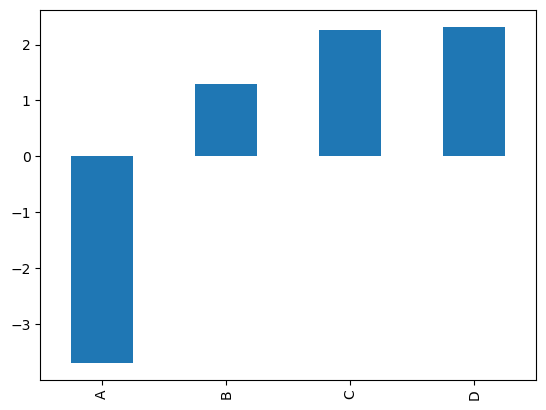

In [13]:
plt.figure();

df.iloc[5].plot(kind="bar");

## Bar plots
For labeled, non-time series data, you may wish to produce a bar plot:

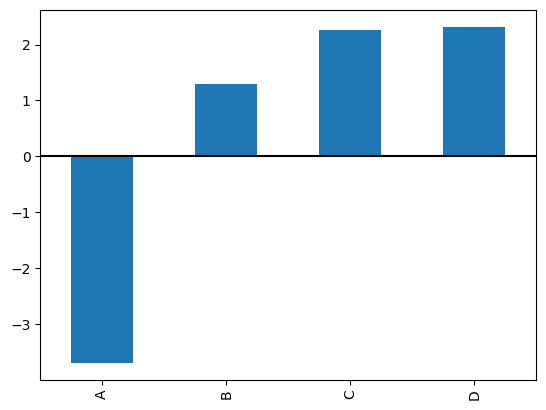

In [15]:
plt.figure();

df.iloc[5].plot.bar();

plt.axhline(0, color="k");

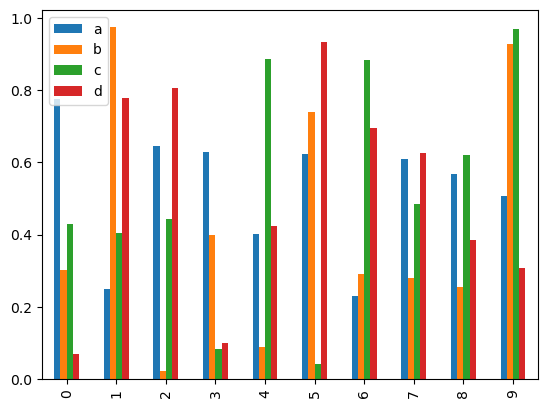

In [16]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=["a", "b", "c", "d"])

df2.plot.bar();

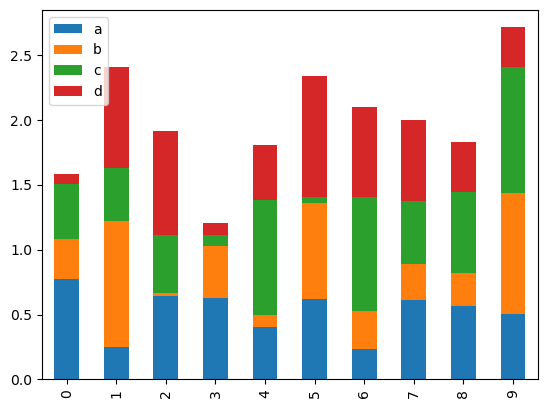

In [17]:
In [23]: df2.plot.bar(stacked=True);

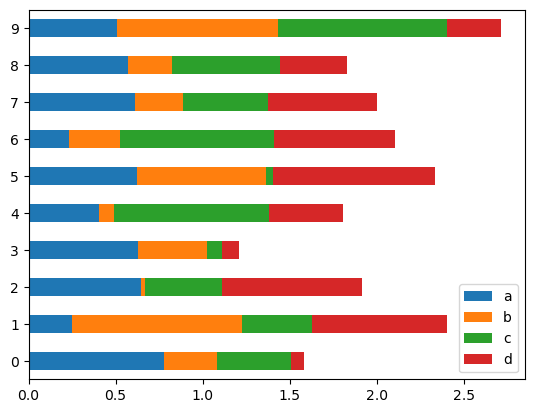

In [18]:
In [24]: df2.plot.barh(stacked=True);

## Histograms
Histograms can be drawn by using the DataFrame.plot.hist() and Series.plot.hist() methods.

<Figure size 640x480 with 0 Axes>

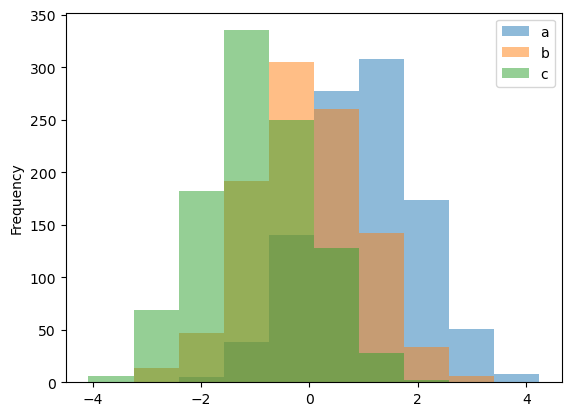

In [19]:
In [25]: df4 = pd.DataFrame(
   ....:     {
   ....:         "a": np.random.randn(1000) + 1,
   ....:         "b": np.random.randn(1000),
   ....:         "c": np.random.randn(1000) - 1,
   ....:     },
   ....:     columns=["a", "b", "c"],
   ....: )
   ....: 

In [26]: plt.figure();

In [27]: df4.plot.hist(alpha=0.5);

<Figure size 640x480 with 0 Axes>

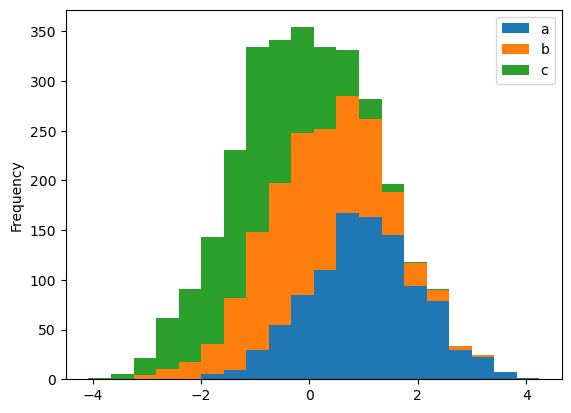

In [20]:
plt.figure();

df4.plot.hist(stacked=True, bins=20);

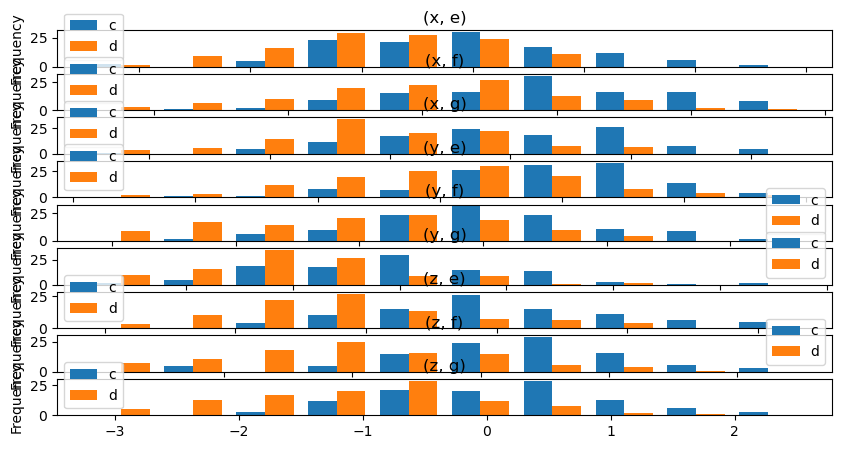

In [21]:
In [38]: data = pd.DataFrame(
   ....:     {
   ....:         "a": np.random.choice(["x", "y", "z"], 1000),
   ....:         "b": np.random.choice(["e", "f", "g"], 1000),
   ....:         "c": np.random.randn(1000),
   ....:         "d": np.random.randn(1000) - 1,
   ....:     },
   ....: )
   ....: 

In [39]: data.plot.hist(by=["a", "b"], figsize=(10, 5));

## Box plots
Boxplot can be drawn calling Series.plot.box() and DataFrame.plot.box(), or DataFrame.boxplot() to visualize the distribution of values within each column.

For instance, here is a boxplot representing five trials of 10 observations of a uniform random variable on [0,1).

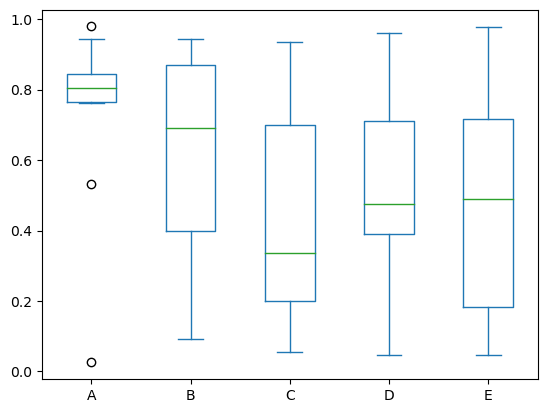

In [22]:
In [40]: df = pd.DataFrame(np.random.rand(10, 5), columns=["A", "B", "C", "D", "E"])

In [41]: df.plot.box();

## Scatter plot
Scatter plot can be drawn by using the DataFrame.plot.scatter() method. Scatter plot requires numeric columns for the x and y axes. These can be specified by the x and y keywords.

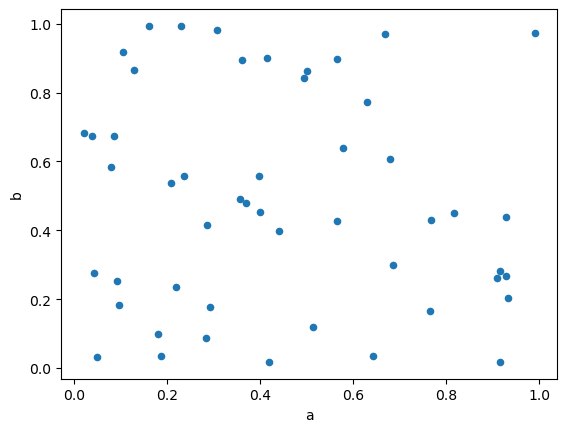

In [23]:
In [70]: df = pd.DataFrame(np.random.rand(50, 4), columns=["a", "b", "c", "d"])

In [71]: df["species"] = pd.Categorical(
   ....:     ["setosa"] * 20 + ["versicolor"] * 20 + ["virginica"] * 10
   ....: )
   ....: 

In [72]: df.plot.scatter(x="a", y="b");

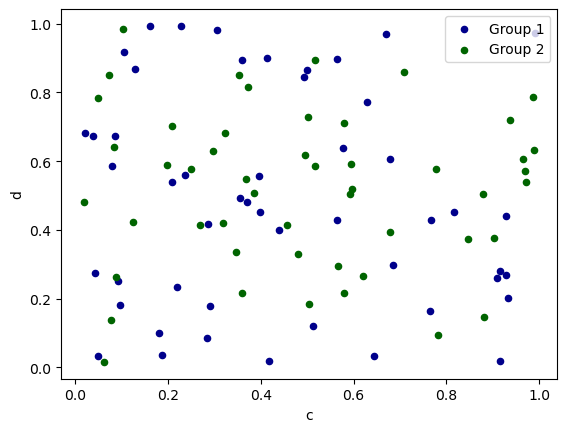

In [24]:
In [73]: ax = df.plot.scatter(x="a", y="b", color="DarkBlue", label="Group 1")

In [74]: df.plot.scatter(x="c", y="d", color="DarkGreen", label="Group 2", ax=ax);

The keyword c may be given as the name of a column to provide colors for each point:

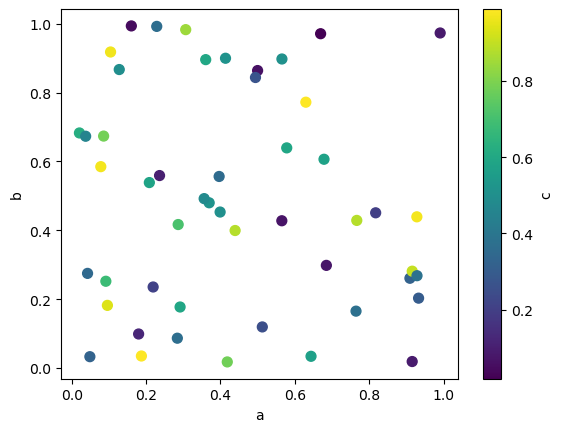

In [25]:
In [75]: df.plot.scatter(x="a", y="b", c="c", s=50);

## Pie plot
You can create a pie plot with DataFrame.plot.pie() or Series.plot.pie(). If your data includes any NaN, they will be automatically filled with 0. A ValueError will be raised if there are any negative values in your data.

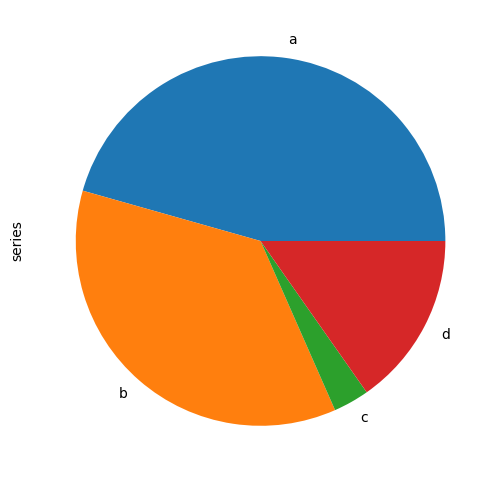

In [26]:
series = pd.Series(3 * np.random.rand(4), index=["a", "b", "c", "d"], name="series")

series.plot.pie(figsize=(6, 6));

## Analysis of Iris petal and sepal sizes
illustrate an analysis on a real dataset:

Visualizing the data to formulate intuitions
Fitting of a linear model
Hypothesis test of the effect of a categorical variable in the presence of a continuous confound


In [28]:
import urllib.request

url = "https://raw.githubusercontent.com/pandas-dev/pandas/main/pandas/tests/io/data/csv/iris.csv"
urllib.request.urlretrieve(url, "iris.csv")


('iris.csv', <http.client.HTTPMessage at 0x1467f161b190>)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

# Load the data
data = pd.read_csv("iris.csv")

# Quick check to see the structure
print(data.head())


   SepalLength  SepalWidth  PetalLength  PetalWidth         Name
0          5.1         3.5          1.4         0.2  Iris-setosa
1          4.9         3.0          1.4         0.2  Iris-setosa
2          4.7         3.2          1.3         0.2  Iris-setosa
3          4.6         3.1          1.5         0.2  Iris-setosa
4          5.0         3.6          1.4         0.2  Iris-setosa


## Plot a scatter matrix

Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


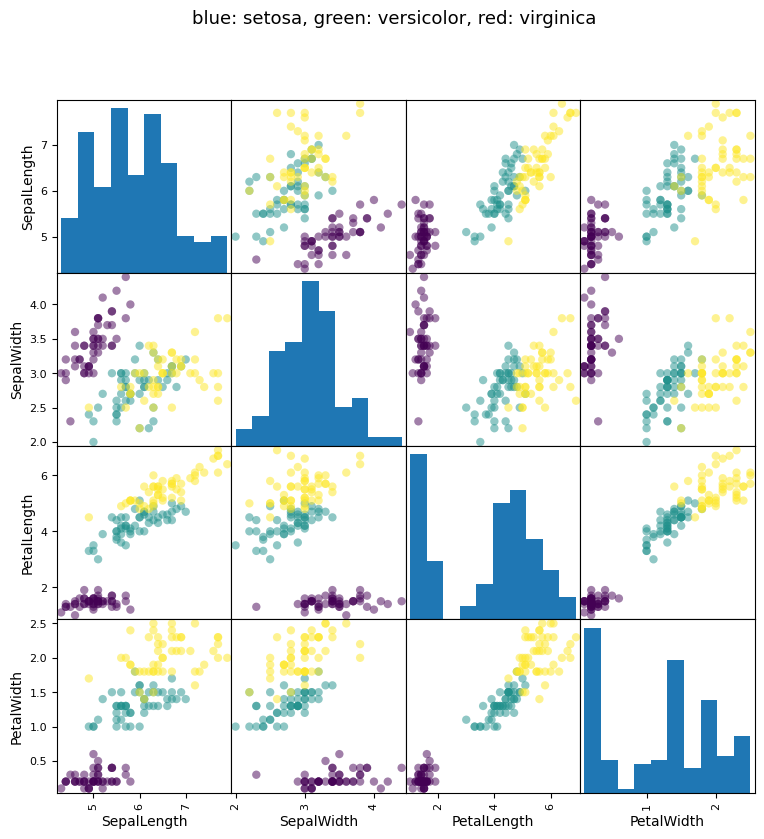

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix  # updated import

# Load the dataset
data = pd.read_csv('iris.csv')

# Check the column names to confirm the label column
print(data.columns)

# Assuming the class label column is named 'Name' or similar
categories = pd.Categorical(data['Name'])  # Replace 'Name' with the correct column name from the print output

# Create the scatter matrix
scatter_matrix(data.iloc[:, :-1], c=categories.codes, marker='o', figsize=(9, 9))

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)

plt.show()


## Statistical analysis

In [34]:
print(data.columns)


Index(['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Name'], dtype='object')


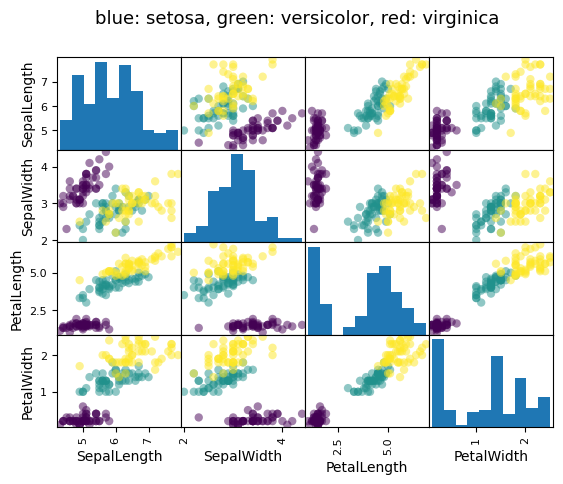

                            OLS Regression Results                            
Dep. Variable:             SepalWidth   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.58e-20
Time:                        12:07:11   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from statsmodels.formula.api import ols

# Load the dataset (you already saved it earlier)
data = pd.read_csv("iris.csv")

# Express the 'Name' column as categorical
categories = pd.Categorical(data['Name'])

# Plot a scatter matrix with color coding by species
scatter_matrix(data, c=categories.codes, marker='o')

fig = plt.gcf()
fig.suptitle("blue: setosa, green: versicolor, red: virginica", size=13)
plt.show()

# Regression: SepalWidth as a function of species and petal length
model = ols('SepalWidth ~ Name + PetalLength', data=data).fit()
print(model.summary())


## Simple Regression
Fit a simple linear regression using ‘statsmodels’, compute corresponding p-values.

In [36]:
# Original author: Thomas Haslwanter

import numpy as np
import matplotlib.pyplot as plt
import pandas

# For statistics. Requires statsmodels 5.0 or more
from statsmodels.formula.api import ols
# Analysis of Variance (ANOVA) on linear models
from statsmodels.stats.anova import anova_lm

## Generating and showing the data

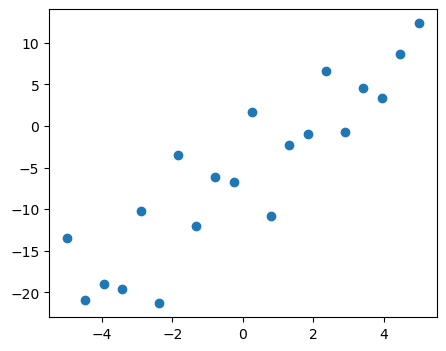

In [37]:
x = np.linspace(-5, 5, 20)

# To get reproducable values, provide a seed value
np.random.seed(1)

y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Plot the data
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')

## Multilinear regression model, calculating fit, P-values, confidence intervals etc.

In [38]:
#  Convert the data into a Pandas DataFrame to use the formulas framework
# in statsmodels
data = pandas.DataFrame({'x': x, 'y': y})

# Fit the model
model = ols("y ~ x", data).fit()

# Print the summary
print(model.summary())

# Peform analysis of variance on fitted linear model
anova_results = anova_lm(model)

print('\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           8.56e-08
Time:                        12:11:27   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

## Plot the fitted model

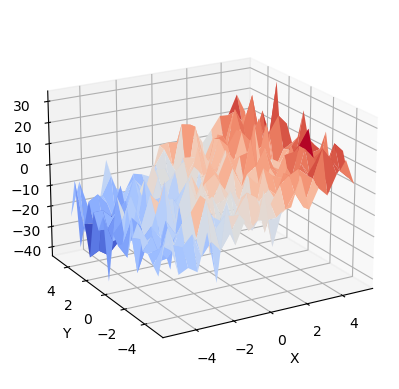

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Needed for 3D plotting

x = np.linspace(-5, 5, 21)

# Create 2D grid
X, Y = np.meshgrid(x, x)

# Reproducible randomness
np.random.seed(1)

# Elevation (Z) based on linear relationship with noise
Z = -5 + 3*X - 0.5*Y + 8 * np.random.normal(size=X.shape)

# Plotting
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Updated this line
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm, rstride=1, cstride=1)

# Set viewpoint and labels
ax.view_init(20, -120)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()


## Multilinear regression model, calculating fit, P-values, confidence intervals etc.

In [7]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# Assuming X, Y, Z are from earlier (3D grid with noise)

# Flatten the 2D arrays to 1D — required for fitting the linear model
X_flat = X.flatten()
Y_flat = Y.flatten()
Z_flat = Z.flatten()

# Create a DataFrame to work with statsmodels' formula API
data = pd.DataFrame({'x': X_flat, 'y': Y_flat, 'z': Z_flat})

# Fit the linear model: z ~ x + y
model = ols("z ~ x + y", data).fit()

# Model summary
print(model.summary())

# Retrieve estimated coefficients
print("\nRetrieving manually the parameter estimates:")
print(model._results.params)  # Equivalent to model.params

# Perform ANOVA on the fitted model
anova_results = anova_lm(model)
print("\nANOVA results:")
print(anova_results)

# Optional: visualize residuals if needed
# residuals = model.resid
# plt.hist(residuals, bins=30)
# plt.title("Histogram of Residuals")
# plt.show()


                            OLS Regression Results                            
Dep. Variable:                      z   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     320.4
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.89e-86
Time:                        12:25:04   Log-Likelihood:                -1537.7
No. Observations:                 441   AIC:                             3081.
Df Residuals:                     438   BIC:                             3094.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.5052      0.378    -11.924      0.0

## Test for an education/gender interaction in wages
Wages depend mostly on education. Here we investigate how this dependence is related to gender: not only does gender create an offset in wages, it also seems that wages increase more with education for males than females.

Load and massage the data

In [4]:
import os
import urllib.request  # <-- THIS IS THE FIX

# Download the dataset if it doesn't exist
if not os.path.exists('wages.txt'):
    urllib.request.urlretrieve(
        'http://lib.stat.cmu.edu/datasets/CPS_85_Wages',
        'wages.txt'
    )


## Simple plotting

In [6]:
import pandas as pd

# Dummy data to test plotting
data = pd.DataFrame({
    'x': [10, 12, 14, 16, 18, 20, 22, 24],
    'y': [100, 110, 115, 130, 150, 170, 180, 200],
    'z': ['male', 'male', 'female', 'female', 'male', 'male', 'female', 'female']
})


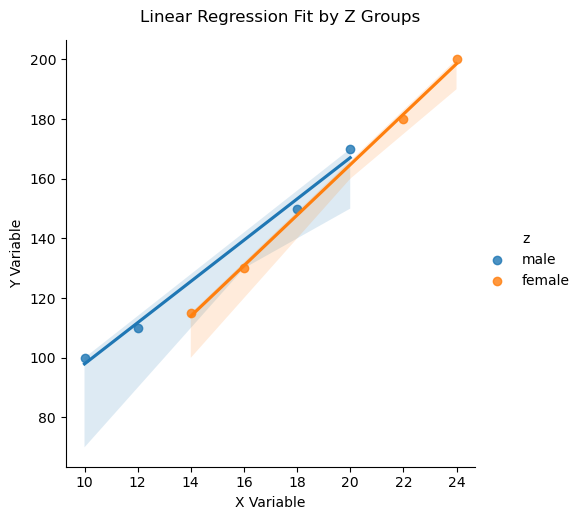

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

g = sns.lmplot(x='x', y='y', hue='z', data=data)
g.set_axis_labels('X Variable', 'Y Variable')
g.fig.suptitle('Linear Regression Fit by Z Groups', y=1.03)
plt.show()


In [10]:
print(data.columns)



Index(['x', 'y', 'z'], dtype='object')


In [12]:
print(data.columns)


Index(['x', 'y', 'z'], dtype='object')


In [13]:
import statsmodels.formula.api as smf

# Fit a linear regression model with y as the outcome
# and x and z as predictors
result = smf.ols(formula='y ~ x + z', data=data).fit()

# Print the regression results summary
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     200.6
Date:                Sun, 20 Jul 2025   Prob (F-statistic):           1.68e-05
Time:                        13:58:56   Log-Likelihood:                -21.984
No. Observations:                   8   AIC:                             49.97
Df Residuals:                       5   BIC:                             50.21
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.2574      8.143      1.260      0.2

/apps/python/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [17]:
import matplotlib.pyplot as plt
plt.show()


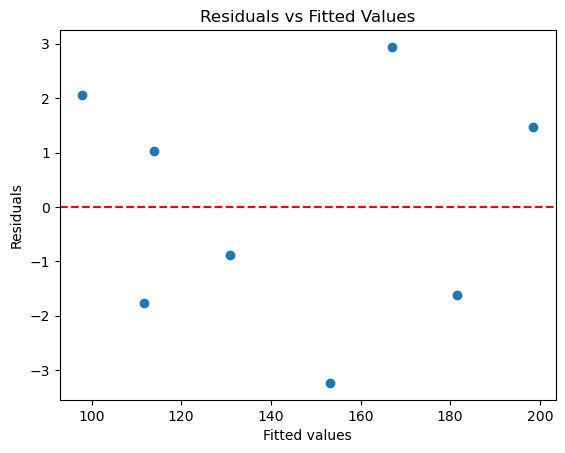

In [18]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Assuming 'result' is your fitted OLS model

# Plot residuals vs fitted values
plt.scatter(result.fittedvalues, result.resid)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


## Visualizing factors influencing wages
This example uses seaborn to quickly plot various factors relating wages, experience and eduction.

Seaborn (https://seaborn.pydata.org) is a library that combines visualization and statistical fits to show ## Trends in data.

Note that importing seaborn changes the matplotlib style to have an “excel-like” feeling. This changes affect other matplotlib figures. To restore defaults once this example is run, we would need to call plt.rcdefaults().

In [19]:
# Standard library imports
import urllib
import os

import matplotlib.pyplot as plt

Load the data

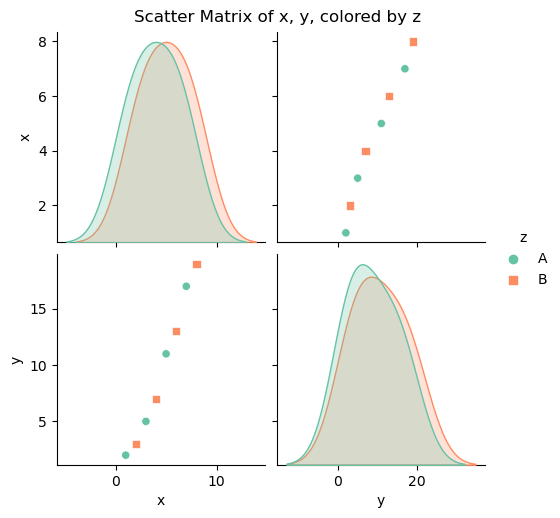

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame (replace with your actual data)
data = pd.DataFrame({
    'x': [1, 2, 3, 4, 5, 6, 7, 8],
    'y': [2, 3, 5, 7, 11, 13, 17, 19],
    'z': ['A', 'B', 'A', 'B', 'A', 'B', 'A', 'B']
})

# Plot scatter matrix highlighting different aspects
# Pairplot plots pairwise relationships in a dataset, colored by 'z'
sns.pairplot(data, hue='z', markers=["o", "s"], palette='Set2')

# Show the plot
plt.suptitle('Scatter Matrix of x, y, colored by z', y=1.02)  # Title above the plots
plt.show()


## Plot a simple regression

In [25]:
print(data.columns)


Index(['x', 'y', 'z'], dtype='object')


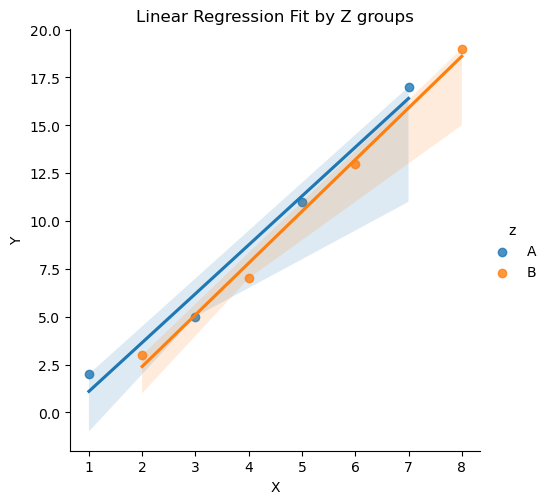

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lmplot(x='x', y='y', hue='z', data=data)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Linear Regression Fit by Z groups')
plt.show()


## Air fares before and after 9/11
This is a business-intelligence (BI) like application.

What is interesting here is that we may want to study fares as a function of the year, paired accordingly to the trips, or forgetting the year, only as a function of the trip endpoints.

Using statsmodels’ linear models, we find that both with an OLS (ordinary least square) and a robust fit, the intercept and the slope are significantly non-zero: the air fares have decreased between 2000 and 2001, and their dependence on distance travelled has also decreased

In [1]:
# Standard library imports
import urllib
import os

In [4]:
import os
import urllib.request
import pandas as pd

# Check if the data file exists; if not, download it
file_name = 'airfares.txt'
url = 'http://www.stat.ufl.edu/~winner/data/airq4.dat'

if not os.path.exists(file_name):
    print(f"Downloading data from {url}...")
    urllib.request.urlretrieve(url, file_name)
    print("Download complete.")

# Read the dataset using regular expressions for space separation
data = pd.read_csv(file_name, sep=' +', engine='python', header=None,
                   names=['city1', 'city2', 'pop1', 'pop2',
                          'dist', 'fare_2000', 'nb_passengers_2000',
                          'fare_2001', 'nb_passengers_2001'])

# Reset index for clarity
data_flat = data.reset_index()

# Prepare 2000 data
data_2000 = data_flat[['city1', 'city2', 'pop1', 'pop2', 'dist',
                       'fare_2000', 'nb_passengers_2000']].copy()
data_2000.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist',
                     'fare', 'nb_passengers']
data_2000['year'] = 2000

# Prepare 2001 data
data_2001 = data_flat[['city1', 'city2', 'pop1', 'pop2', 'dist',
                       'fare_2001', 'nb_passengers_2001']].copy()
data_2001.columns = ['city1', 'city2', 'pop1', 'pop2', 'dist',
                     'fare', 'nb_passengers']
data_2001['year'] = 2001

# Combine both years
data_flat = pd.concat([data_2000, data_2001], ignore_index=True)

# Preview the reshaped dataframe
print(data_flat.head())


Download complete.
  city1 city2    pop1     pop2  dist    fare  nb_passengers  year
0   ABE   ATL  613.84  3627.18   692  215.77         102.17  2000
1   ABE   BNA  613.84  1134.52   685  272.26          24.45  2000
2   ABE   CLE  613.84  2908.44   339  322.20          23.36  2000
3   ABE   CLT  613.84  1350.24   480  250.27          52.60  2000
4   ABE   CMH  613.84  1460.24   395  259.29          19.23  2000


## Plot scatter matrices highlighting different aspects

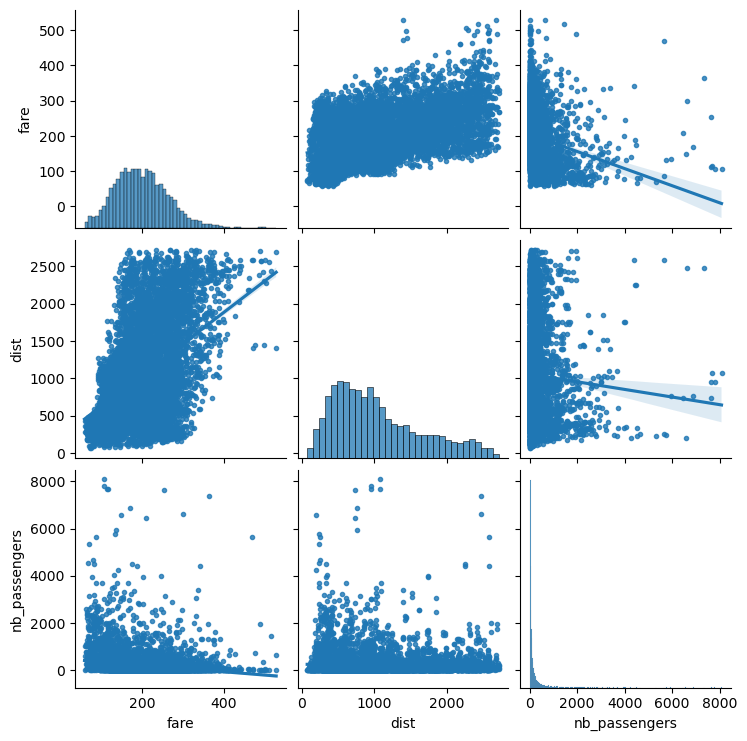

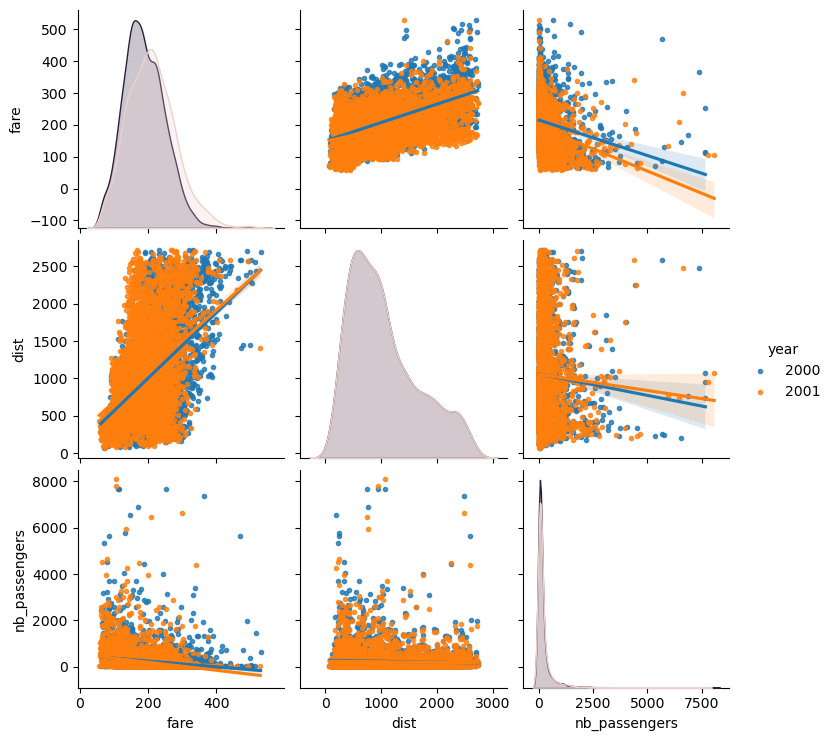

In [5]:
import seaborn
seaborn.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
                 kind='reg', markers='.')

# A second plot, to show the effect of the year (ie the 9/11 effect)
seaborn.pairplot(data_flat, vars=['fare', 'dist', 'nb_passengers'],
                 kind='reg', hue='year', markers='.')

## Plot the difference in fare

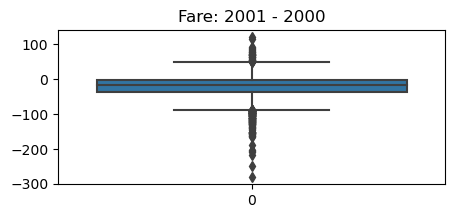

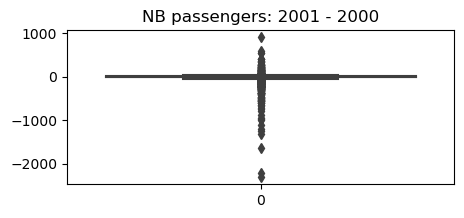

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 2))
seaborn.boxplot(data.fare_2001 - data.fare_2000)
plt.title('Fare: 2001 - 2000')
plt.subplots_adjust()

plt.figure(figsize=(5, 2))
seaborn.boxplot(data.nb_passengers_2001 - data.nb_passengers_2000)
plt.title('NB passengers: 2001 - 2000')
plt.subplots_adjust()

## Statistical testing: dependence of fare on distance and number of passengers

In [7]:
import statsmodels.formula.api as sm

result = sm.ols(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
print(result.summary())

# Using a robust fit
result = sm.rlm(formula='fare ~ 1 + dist + nb_passengers', data=data_flat).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   fare   R-squared:                       0.229
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     1237.
Date:                Sun, 20 Jul 2025   Prob (F-statistic):               0.00
Time:                        14:55:53   Log-Likelihood:                -45802.
No. Observations:                8354   AIC:                         9.161e+04
Df Residuals:                    8351   BIC:                         9.163e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       154.1983      1.298    118.822

## Statistical testing: regression of fare on distance: 2001/2000 difference

                            OLS Regression Results                            
Dep. Variable:              fare_2001   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     791.8
Date:                Sun, 20 Jul 2025   Prob (F-statistic):          1.13e-159
Time:                        14:57:06   Log-Likelihood:                -22645.
No. Observations:                4177   AIC:                         4.529e+04
Df Residuals:                    4175   BIC:                         4.531e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.0342      1.673     88.504      0.0

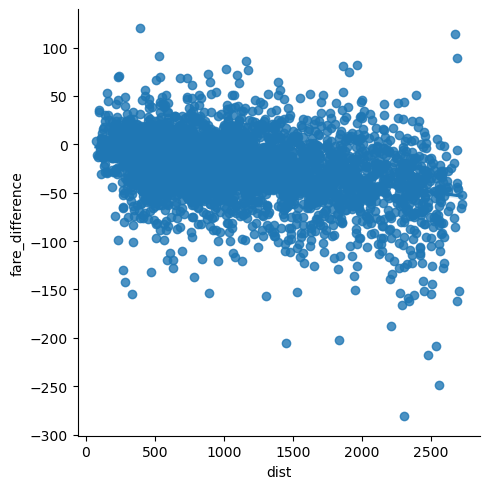

In [8]:
result = sm.ols(formula='fare_2001 - fare_2000 ~ 1 + dist', data=data).fit()
print(result.summary())

# Plot the corresponding regression
data['fare_difference'] = data['fare_2001'] - data['fare_2000']
seaborn.lmplot(x='dist', y='fare_difference', data=data)

plt.show()